In [2]:
# Dataset obtained from ChemSpace Database

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = PandasTools.LoadSDF(r"C:\Users\sneha\Desktop\Comp Chem\vscode\ChemSpace_Simvastatin_similar_comp.sdf")
dataset.head()

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol
0,CSSB00000743840,https://chem-space.com/CSSB00000743840,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",79902-63-9,MFCD00072007,418.572,CSSB00000743840,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...
1,CSSB00020590635,https://chem-space.com/CSSB00020590635,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,"8-[2-(4-hydroxy-6-oxooxan-2-yl)ethyl]-3,7-dime...",892395-81-2,MFCD08064836,418.572,CSSB00020590635,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...
2,CSSB02515421289,https://chem-space.com/CSSB02515421289,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S)-8-{2-[(2R,4R)-4-hydroxy-6-oxooxa...",79902-63-9,MFCD00072007,418.572,CSSB02515421289,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...
3,CSSB00020663371,https://chem-space.com/CSSB00020663371,CCC(C)(C)C(=O)O[C@H]1CC(=C)C=C2C=C[C@H](C)[C@H...,"(1S,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-oxoox...",121624-18-8,,416.556,CSSB00020663371,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...
4,CSSB00160816093,https://chem-space.com/CSSB00160816093,[2H]C([2H])([2H])C(CC)(C(=O)O[C@H]1C[C@@H](C)C...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",1002347-71-8,,424.609,CSSB00160816093,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...


In [5]:
PandasTools.AddMoleculeColumnToFrame(dataset,'smiles', 'Structure')
dataset.head()

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol,Structure
0,CSSB00000743840,https://chem-space.com/CSSB00000743840,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",79902-63-9,MFCD00072007,418.572,CSSB00000743840,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...
1,CSSB00020590635,https://chem-space.com/CSSB00020590635,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,"8-[2-(4-hydroxy-6-oxooxan-2-yl)ethyl]-3,7-dime...",892395-81-2,MFCD08064836,418.572,CSSB00020590635,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...
2,CSSB02515421289,https://chem-space.com/CSSB02515421289,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S)-8-{2-[(2R,4R)-4-hydroxy-6-oxooxa...",79902-63-9,MFCD00072007,418.572,CSSB02515421289,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...
3,CSSB00020663371,https://chem-space.com/CSSB00020663371,CCC(C)(C)C(=O)O[C@H]1CC(=C)C=C2C=C[C@H](C)[C@H...,"(1S,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-oxoox...",121624-18-8,,416.556,CSSB00020663371,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...
4,CSSB00160816093,https://chem-space.com/CSSB00160816093,[2H]C([2H])([2H])C(CC)(C(=O)O[C@H]1C[C@@H](C)C...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",1002347-71-8,,424.609,CSSB00160816093,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...


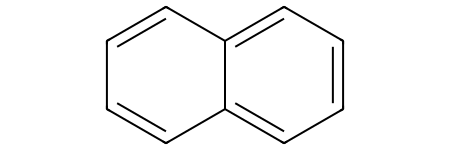

In [6]:
Naphthalene = AllChem.MolFromSmiles('c1c2ccccc2ccc1')
Naphthalene

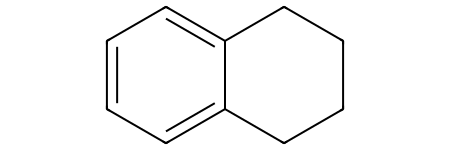

In [7]:
Tetralin = AllChem.MolFromSmiles('c1ccc2c(c1)CCCC2')
Tetralin

In [8]:
bit_naph = {}
bit_tetr = {}

Naphthalene_mfp = AllChem.GetMorganFingerprintAsBitVect(Naphthalene, 2, nBits=2048, bitInfo=bit_naph) 
Tetralin_mfp = AllChem.GetMorganFingerprintAsBitVect(Tetralin, 2, nBits=2048, bitInfo=bit_tetr) 

In [9]:
print("Naphthalene:   ", sorted(set(Naphthalene_mfp.GetOnBits())))
print("Tetralin:      ", sorted(set(Tetralin_mfp.GetOnBits())))

Naphthalene:    [598, 1087, 1088, 1199, 1380, 1750, 1855, 1873]
Tetralin:       [242, 310, 556, 926, 1028, 1088, 1199, 1236, 1380, 1708, 1738, 1750, 1873]


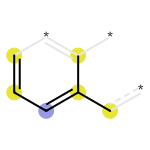

In [10]:
Draw.DrawMorganBit(Naphthalene, 1087, bit_naph)

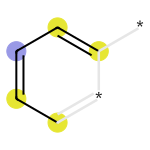

In [11]:
Draw.DrawMorganBit(Tetralin, 1199, bit_tetr)

In [13]:
Intersection = set(Naphthalene_mfp.GetOnBits()) & set(Tetralin_mfp.GetOnBits())
print("Intersection:", Intersection)
print("No. of Bits in Intersection:", len(Intersection))

Union = set(Naphthalene_mfp.GetOnBits()) | set(Tetralin_mfp.GetOnBits())
print("Union:", Union)
print("No. of Bits in Union:", len(Union))

Intersection: {1088, 1380, 1199, 1873, 1750}
No. of Bits in Intersection: 5
Union: {1088, 1028, 1738, 1873, 1236, 598, 1750, 1087, 926, 1380, 556, 1708, 1199, 242, 310, 1855}
No. of Bits in Union: 16


In [14]:
print("Tanimoto coefficient:", len(Intersection)/len(Union))

Tanimoto coefficient: 0.3125


In [16]:
DataStructs.FingerprintSimilarity(Naphthalene_mfp, Tetralin_mfp, metric=DataStructs.TanimotoSimilarity)

0.3125

In [20]:
print("Tanimoto Similarity: ",DataStructs.FingerprintSimilarity(Naphthalene_mfp, Tetralin_mfp, metric=DataStructs.TanimotoSimilarity))
print("Dice Similarity:   ", DataStructs.FingerprintSimilarity(Naphthalene_mfp, Tetralin_mfp, metric=DataStructs.DiceSimilarity))
print("Cosine Similarity: ",DataStructs.FingerprintSimilarity(Naphthalene_mfp, Tetralin_mfp, metric=DataStructs.CosineSimilarity))

Tanimoto Similarity:  0.3125
Dice Similarity:    0.47619047619047616
Cosine Similarity:  0.4902903378454601


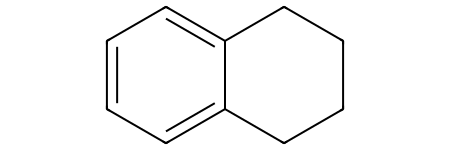

In [22]:
test = AllChem.MolFromSmiles('c1ccc2c(c1)CCCC2')
test_fps = AllChem.GetMorganFingerprintAsBitVect(test, 2, nBits=4096)
test

In [24]:
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]
len(all_Mfpts)

2000

In [25]:
Tanimoto_similarity = [DataStructs.FingerprintSimilarity(test_fps, x, metric=DataStructs.TanimotoSimilarity) for x in all_Mfpts]

In [39]:
dataset["Tanimoto_Values"] = Tanimoto_similarity
dataset_sorted = dataset.sort_values(['Tanimoto_Values'],ascending=False)
dataset_sorted

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol,Structure,Tanimoto Values,Tanimoto_Values
1312,CSMB01148341156,https://chem-space.com/CSMB01148341156,CC1OC2(C)CC1(C2)C(=O)NC1=CC=C2C=CC=CC2=C1,"1,3-dimethyl-N-(naphthalen-2-yl)-2-oxabicyclo[...",2445791-84-2,,281.354,CSMB01148341156,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.155556,0.155556
144,CSMB03608542084,https://chem-space.com/CSMB03608542084,CCC(C)(C)C(=O)O[C@@H]1CC[C@@H]1OCc2ccccc2 |&1:...,"rac-(1S,2R)-2-(benzyloxy)cyclobutyl 2,2-dimeth...",,,276.375,CSMB03608542084,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
145,CSMB03608549051,https://chem-space.com/CSMB03608549051,CCC(C)(C)C(=O)O[C@@H]1CC[C@H]1OCc2ccccc2 |&1:8...,"rac-(1R,2R)-2-(benzyloxy)cyclobutyl 2,2-dimeth...",,,276.375,CSMB03608549051,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
143,CSMB03550488544,https://chem-space.com/CSMB03550488544,CCC(C)(C)C(=O)OC1CCC1OCc2ccccc2,"2-(benzyloxy)cyclobutyl 2,2-dimethylbutanoate",,,276.375,CSMB03550488544,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
816,CSMB02533106851,https://chem-space.com/CSMB02533106851,CC1CN(C(C)C(C)N1CC1=CC=CC=C1)C(=O)C1=NSC=C1B1O...,"4-benzyl-2,3,5-trimethyl-1-[4-(4,4,5,5-tetrame...",,,455.429,CSMB02533106851,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.135593,0.135593
...,...,...,...,...,...,...,...,...,...,...,...,...
435,CSMB00018773262,https://chem-space.com/CSMB00018773262,CCC(C)(C)C(=O)OC(C)C=C,"but-3-en-2-yl 2,2-dimethylbutanoate",,,170.251,CSMB00018773262,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,0.000000,0.000000
78,CSSB00010421335,https://chem-space.com/CSSB00010421335,CCC(C)(C)C(=O)C(C)Br,"2-bromo-4,4-dimethylhexan-3-one",65840-85-9,MFCD24477962,207.11,CSSB00010421335,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.000000,0.000000
267,CSMB06279452460,https://chem-space.com/CSMB06279452460,CC(C)(C)OC(=O)NCC(O)CC(=O)OC(CCC=C)CCC=C,"nona-1,8-dien-5-yl 4-{[(tert-butoxy)carbonyl]a...",,,341.446,CSMB06279452460,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0C...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,0.000000,0.000000
70,CSSB02495362880,https://chem-space.com/CSSB02495362880,O.CCCC[C@@H](C)[C@@H](OC(=O)C[C@@H](CC(O)=O)C(...,"(2R)-2-(2-{[(5R,6R,9S,11R,16R,18S,19S)-19-amin...",116355-83-0,,739.849,CSSB02495362880,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF3F...,0.000000,0.000000


In [40]:
dataset_sorted[dataset_sorted['Tanimoto_Values'] >= 0.13]

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol,Structure,Tanimoto Values,Tanimoto_Values
1312,CSMB01148341156,https://chem-space.com/CSMB01148341156,CC1OC2(C)CC1(C2)C(=O)NC1=CC=C2C=CC=CC2=C1,"1,3-dimethyl-N-(naphthalen-2-yl)-2-oxabicyclo[...",2445791-84-2,,281.354,CSMB01148341156,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.155556,0.155556
144,CSMB03608542084,https://chem-space.com/CSMB03608542084,CCC(C)(C)C(=O)O[C@@H]1CC[C@@H]1OCc2ccccc2 |&1:...,"rac-(1S,2R)-2-(benzyloxy)cyclobutyl 2,2-dimeth...",,,276.375,CSMB03608542084,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
145,CSMB03608549051,https://chem-space.com/CSMB03608549051,CCC(C)(C)C(=O)O[C@@H]1CC[C@H]1OCc2ccccc2 |&1:8...,"rac-(1R,2R)-2-(benzyloxy)cyclobutyl 2,2-dimeth...",,,276.375,CSMB03608549051,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
143,CSMB03550488544,https://chem-space.com/CSMB03550488544,CCC(C)(C)C(=O)OC1CCC1OCc2ccccc2,"2-(benzyloxy)cyclobutyl 2,2-dimethylbutanoate",,,276.375,CSMB03550488544,<rdkit.Chem.rdchem.Mol object at 0x0000017DF0B...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1F...,0.136364,0.136364
816,CSMB02533106851,https://chem-space.com/CSMB02533106851,CC1CN(C(C)C(C)N1CC1=CC=CC=C1)C(=O)C1=NSC=C1B1O...,"4-benzyl-2,3,5-trimethyl-1-[4-(4,4,5,5-tetrame...",,,455.429,CSMB02533106851,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.135593,0.135593
366,CSMB00442217835,https://chem-space.com/CSMB00442217835,C[C@@H]1CN(CC2=CC=CC=C2)CCN1C(=O)CC1CCC(CC1)C(...,4-{2-[(2R)-4-benzyl-2-methylpiperazin-1-yl]-2-...,,,358.48,CSMB00442217835,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,0.134615,0.134615
368,CSMB02227456657,https://chem-space.com/CSMB02227456657,C[C@H]1CN(CC2=CC=CC=C2)CCN1C(=O)CC1CCC(CC1)C(O)=O,4-{2-[(2S)-4-benzyl-2-methylpiperazin-1-yl]-2-...,,,358.48,CSMB02227456657,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,0.134615,0.134615
367,CSMB01089805114,https://chem-space.com/CSMB01089805114,CC1CN(CC2=CC=CC=C2)CCN1C(=O)CC1CCC(CC1)C(O)=O,4-[2-(4-benzyl-2-methylpiperazin-1-yl)-2-oxoet...,,,358.48,CSMB01089805114,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,0.134615,0.134615
907,CSMB00036932930,https://chem-space.com/CSMB00036932930,CC(C)C(C)NC(=O)CN(CC1CCCO1)CC1=CC=CC=C1,2-{benzyl[(oxolan-2-yl)methyl]amino}-N-(3-meth...,,,318.459,CSMB00036932930,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.132075,0.132075
1449,CSMB00102753988,https://chem-space.com/CSMB00102753988,CCC(C)(NC(=O)OCC1C2=CC=CC=C2C2=CC=CC=C12)C(=O)...,1-[2-({[(9H-fluoren-9-yl)methoxy]carbonyl}amin...,2171937-52-1,,464.56,CSMB00102753988,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1E...,<rdkit.Chem.rdchem.Mol object at 0x0000017DF1D...,0.131148,0.131148


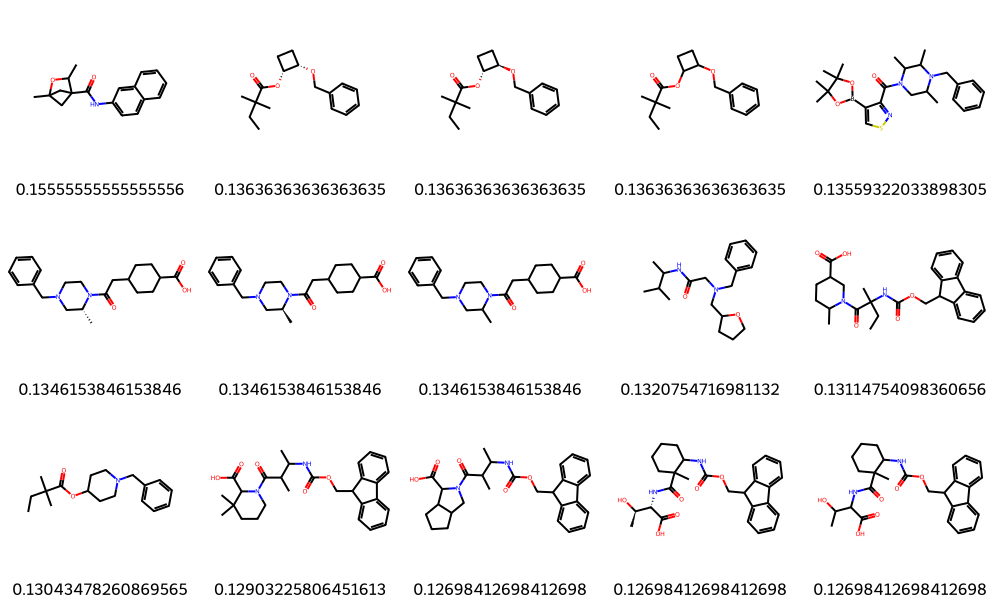

In [41]:
Draw.MolsToGridImage([x for x in dataset_sorted["Structure"]][:15], maxMols=100, 
                     legends=[str(x) for x in dataset_sorted.Tanimoto_Values], subImgSize=(200,200), molsPerRow=5)